In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import geopandas as gpd
import rasterio as rio
import numpy as np
from pjgris import cal_pej0_for_each_flowline_raw, cal_avg_for_each_basin, my_savgol_filter
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
# from pjgris import savgol_smoothing, pe_corefun, cal_pej0_for_each_flowline
# import utils
# from netCDF4 import Dataset
# from pathlib import Path

In [3]:
in_file = '/home/jovyan/Projects/LubriSens/Lab/Create_flowline/flowline_statpts4_clean_EPSG32633.shp'
bed_file = '/home/jovyan/Projects/LubriSens/Data/Austfonna_ITMIX/Farinotti_Austfonna_bedrock.asc'
surface_file = '/home/jovyan/Projects/LubriSens/Data/Austfonna_ITMIX/02_surface_Austfonna_2007_UTM33.asc'
speed_file = '/home/jovyan/Projects/LubriSens/Data/Austfonna_ITMIX/06_speed_Austfonna_1995-1996_UTM33.asc'
speeddiff_file = '/home/jovyan/Projects/LubriSens/Data/Austfonna/SRA_G0240_2018_v_EPSG32633.tif'

In [4]:
data = gpd.read_file(in_file)
src_bed = rio.open(bed_file)
src_surface = rio.open(surface_file)
src_speed = rio.open(speed_file)
src_speeddiff = rio.open(speeddiff_file)
# data

In [5]:
b_collection = []
s_collection = []
u_collection = []
d_collection = []
udiff_collection = []

for idx, row in data.iterrows():
    surface_gen = src_surface.sample(row.geometry.coords)
    s = np.array([float(record) for record in surface_gen])
    s[s < -9998] = np.nan
    s_collection.append(s)
    bed_gen = src_bed.sample(row.geometry.coords)
    b = np.array([float(record) for record in bed_gen])
    b[b < -9998] = np.nan
    b_collection.append(b)
    d_stop = (len(row.geometry.coords) - 1)* 50
    d = np.linspace(0, d_stop, len(row.geometry.coords))
    d_collection.append(d)
    speed_gen = src_speed.sample(row.geometry.coords)
    u = np.array([float(record) for record in speed_gen])
    u[u < 0] = np.nan
    u_collection.append(u)
    speeddiff_gen = src_speeddiff.sample(row.geometry.coords)
    udiff = np.array([float(record) for record in speeddiff_gen])
    udiff[udiff < 0] = np.nan
    udiff_collection.append(udiff)

In [6]:
data['d'] = d_collection
data['s'] = s_collection
data['b'] = b_collection
data['u'] = u_collection
data['udiff'] = udiff_collection
data

,glacier_id,geometry,d,s,b,u,udiff
0,11,"LINESTRING (661744.501 8812864.548, 661772.209...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[124.80580139160156, 125.9896011352539, 126.51...","[6.389999866485596, 6.630000114440918, 6.76000...","[9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0...","[11.063974380493164, 11.063974380493164, 11.06..."
1,12,"LINESTRING (664882.963 8810146.886, 664950.156...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[105.45079803466797, 107.12020111083984, 107.8...","[-66.0, -75.98999786376953, -78.91999816894531...","[12.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14....","[12.367168426513672, 13.066291809082031, 13.06..."
2,13,"LINESTRING (669704.623 8810585.218, 669770.209...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[130.61459350585938, 132.28590393066406, 132.4...","[-107.91999816894531, -113.83999633789062, -11...","[18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17....","[11.827197074890137, 11.60464096069336, 11.227..."
3,14,"LINESTRING (673035.951 8808972.154, 673095.381...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[127.32119750976562, 127.9738998413086, 128.56...","[-41.369998931884766, -45.77000045776367, -47....","[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....","[13.100274085998535, 13.100274085998535, 13.10..."
4,15,"LINESTRING (676753.012 8808446.155, 676815.893...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[144.21249389648438, 146.13330078125, 147.1508...","[-46.41999816894531, -50.880001068115234, -53....","[9.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...","[14.6007080078125, 14.6007080078125, 14.600708..."
5,16,"LINESTRING (680680.473 8808481.221, 680771.006...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[142.48159790039062, 142.54119873046875, 142.3...","[-84.48999786376953, -88.70999908447266, -89.3...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[35.4969367980957, 35.4969367980957, 35.496936..."
6,31,"LINESTRING (709733.163 8827112.114, 709698.322...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2321.27685546875, 2328.1025390625, 2328.10253..."
7,32,"LINESTRING (712538.492 8829608.857, 712479.960...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2434.477783203125, 2500.58251953125, 2500.582..."
8,33,"LINESTRING (714393.516 8832506.236, 714323.676...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2446.584228515625, 2455.040283203125, 2455.04..."
9,34,"LINESTRING (716679.860 8836349.537, 716585.703...","[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1265.9742431640625, 1280.109375, 1280.109375,..."


In [7]:
results = {1: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 10: {}, 17: {}}

for idx, row in data.iterrows():
    data_group = cal_pej0_for_each_flowline_raw(row['d'], row['s'], row['b'], row['u'], savgol_winlength=251)
    
    if data_group is not None:
        data_group['udiff'] = row['udiff']
        udiff_sm = my_savgol_filter(row['udiff'], window_length=151, polyorder=1, deriv=0, delta=50, mode='interp')
        data_group['udiff_sm'] = udiff_sm
        basin_no = row['glacier_id'] // 10
        flowline_no = row['glacier_id'] % 10
        results[basin_no][flowline_no] = data_group
        # results[row['glacier_id']] = data_group

In [8]:
for key in results:
    data_group = results[key]
    avg = cal_avg_for_each_basin(data_group)
    results[key]['avg'] = avg

In [9]:
# results[1]['avg']

Text(0.5, 1.0, 'Dot spacing: 50 m; \n Big dot indicates the first non-NaN value (the one closest to the terminus)')

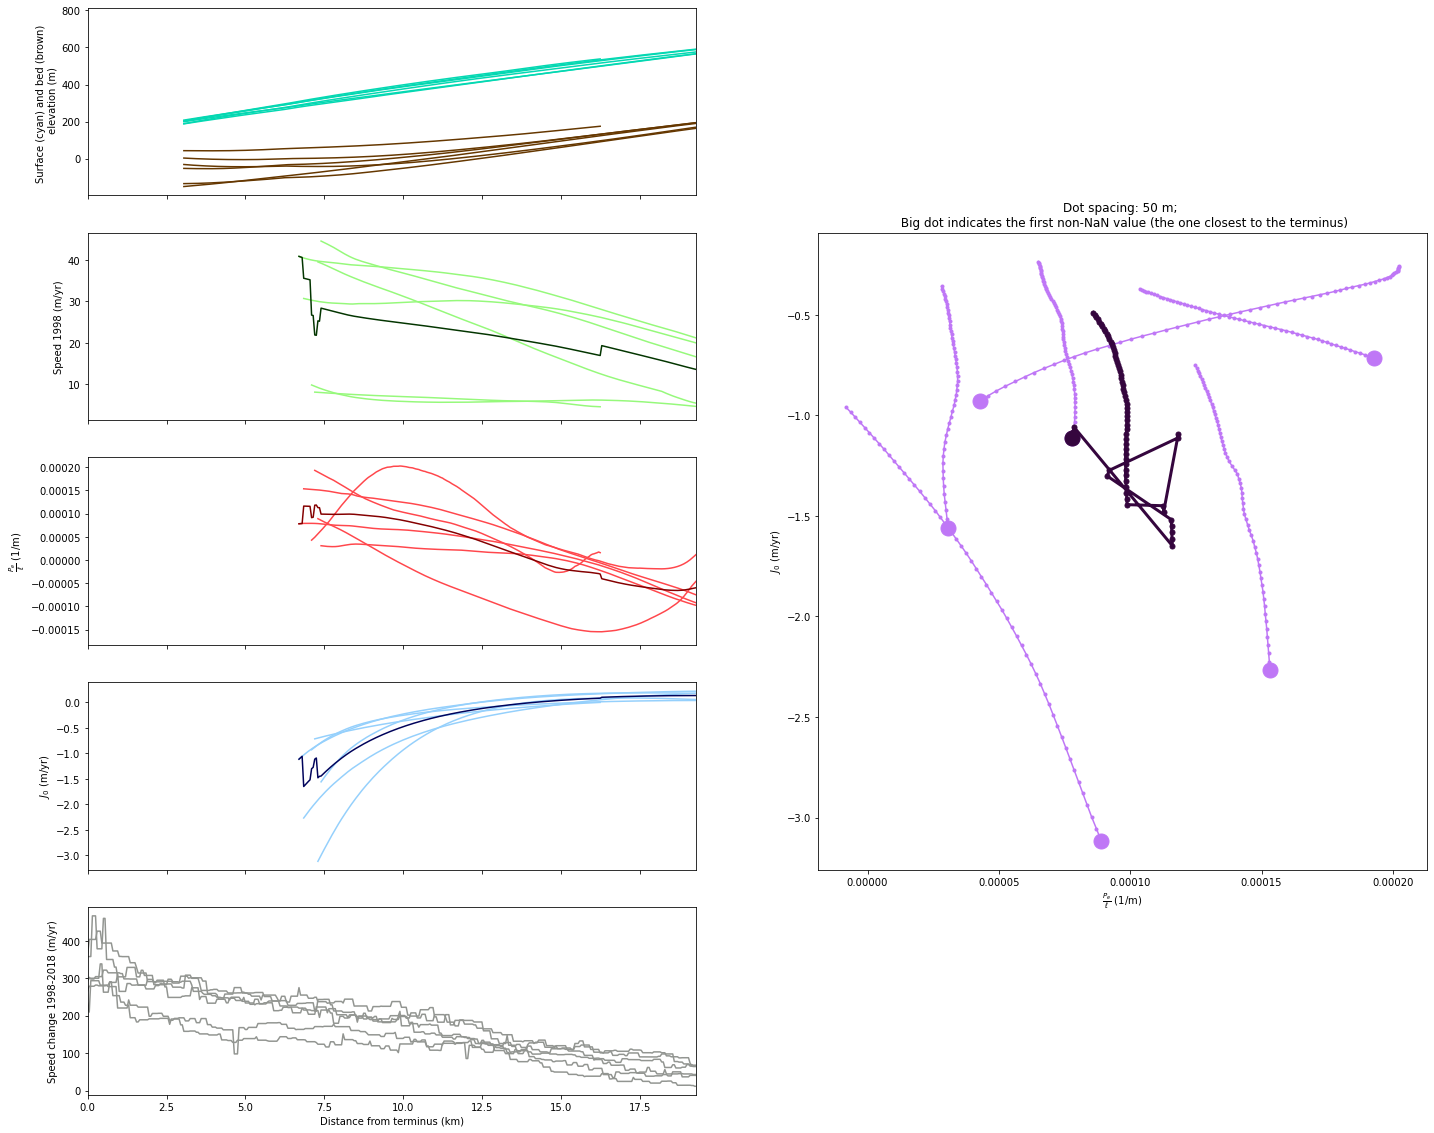

In [10]:
# results

basin_no = 5

fig, ax1 = plt.subplots(5, 2, sharex=True, figsize=(24, 20))
gs = ax1[1, 1].get_gridspec()
for ax in ax1[:, 1]:
    ax.remove()
axbig = fig.add_subplot(gs[1:4, 1])

pej0_plot_length = 200
# fig, ax1 = plt.subplots(5, 1, sharex=True, figsize=(10, 15))
for key in results[basin_no]:
    if key != 'avg':
        ax1[0, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['s'], color='xkcd:aquamarine')
        ax1[0, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['b'], color='xkcd:brown')
        ax1[1, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['u'], color='xkcd:light green')
        ax1[2, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['pe_ignore_dslope'], color='xkcd:light red')
        ax1[3, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['j0_ignore_dslope'], color='xkcd:light blue')
        ax1[4, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['udiff'], color='xkcd:gray')
        axbig.plot(results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length], results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length], '.-', color='xkcd:light purple')
        # plot first non-NaN value (the one closest to the terminus)
        axbig.plot(next(x for x in results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)),
                   next(x for x in results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:light purple', markersize=30)
    else:
        ax1[1, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['u'], color='xkcd:dark green')
        ax1[2, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['pe_ignore_dslope'], color='xkcd:dark red')
        ax1[3, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['j0_ignore_dslope'], color='xkcd:dark blue')
        axbig.plot(results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length], results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length], '.-', color='xkcd:dark purple', linewidth=3, markersize=10)
        # plot first non-NaN value (the one closest to the terminus)
        axbig.plot(next(x for x in results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)),
                   next(x for x in results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:dark purple', markersize=30)
        
# ax1[0].set_title(Path(glacier_file).stem)
ax1[0, 0].set_ylabel('Surface (cyan) and bed (brown) \n elevation (m)')
ax1[1, 0].set_ylabel('Speed 1998 (m/yr)')
ax1[2, 0].set_ylabel(r'$\frac{P_e}{\ell}$ (1/m)')
# ax1[2].set_ylim([-0.001, 0.001])
ax1[3, 0].set_ylabel(r'$J_0$ (m/yr)')
# ax1[3].set_ylim([-3000, 3000])
ax1[4, 0].set_xlabel('Distance from terminus (km)')
ax1[4, 0].set_ylabel('Speed change 1998-2018 (m/yr)')
ax1[4, 0].set_xlim([0, results[basin_no]['avg']['d'][-1]])
axbig.set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
axbig.set_ylabel(r'$J_0$ (m/yr)')
axbig.set_title('Dot spacing: 50 m; \n Big dot indicates the first non-NaN value (the one closest to the terminus)')

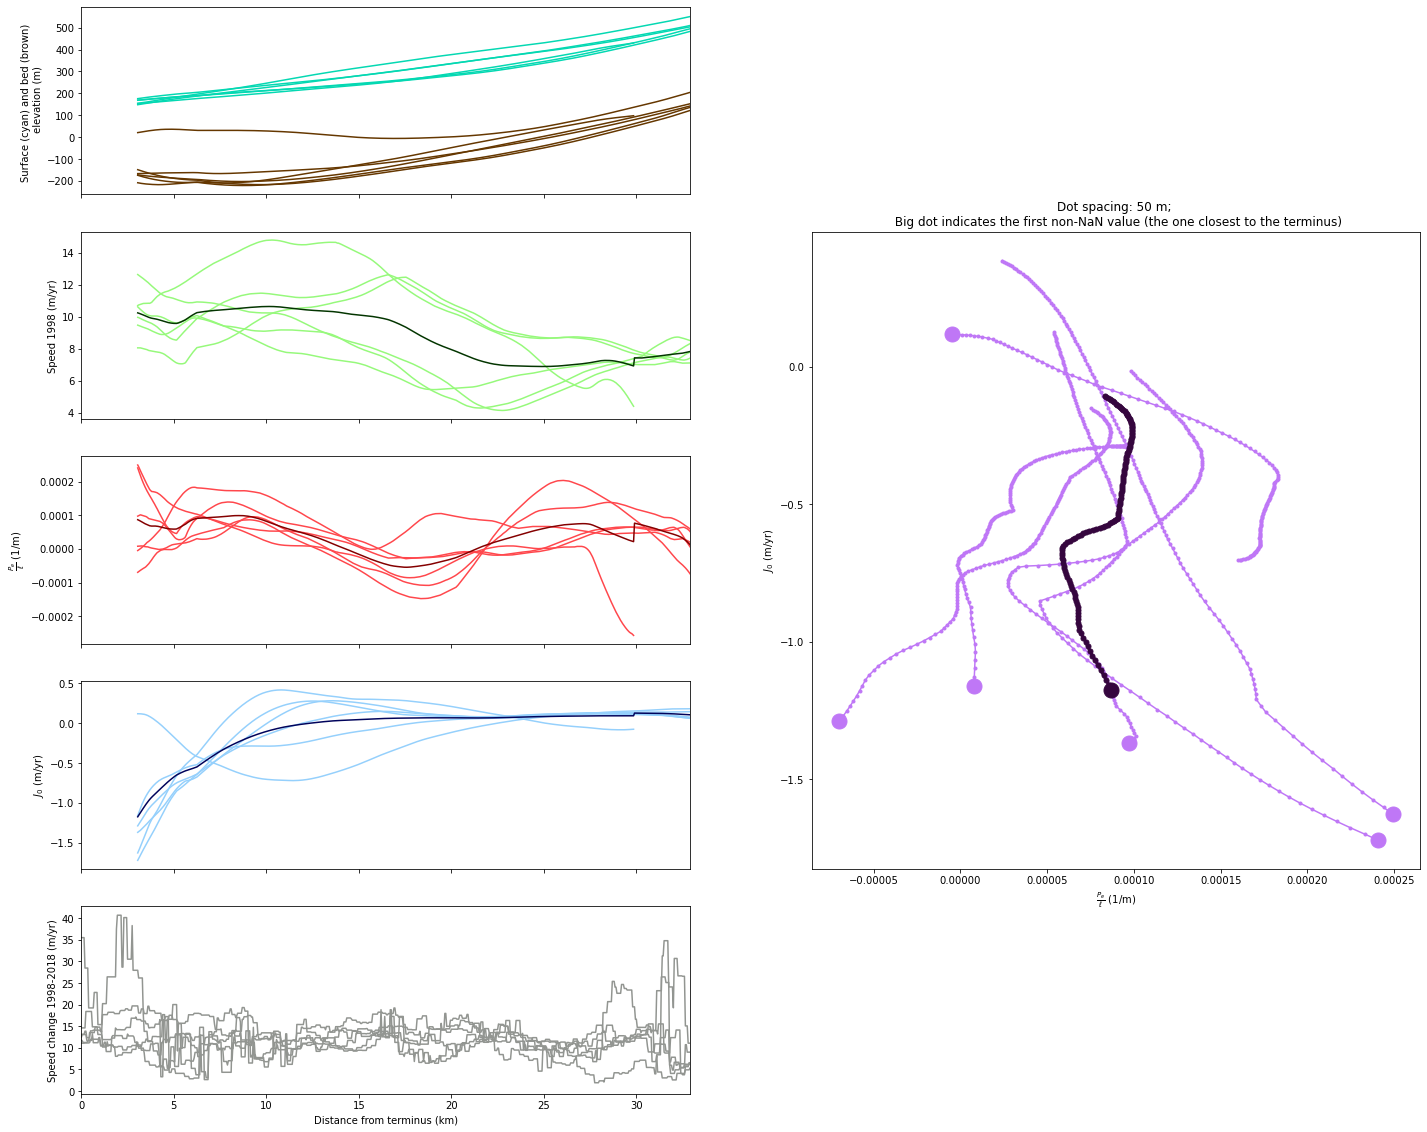

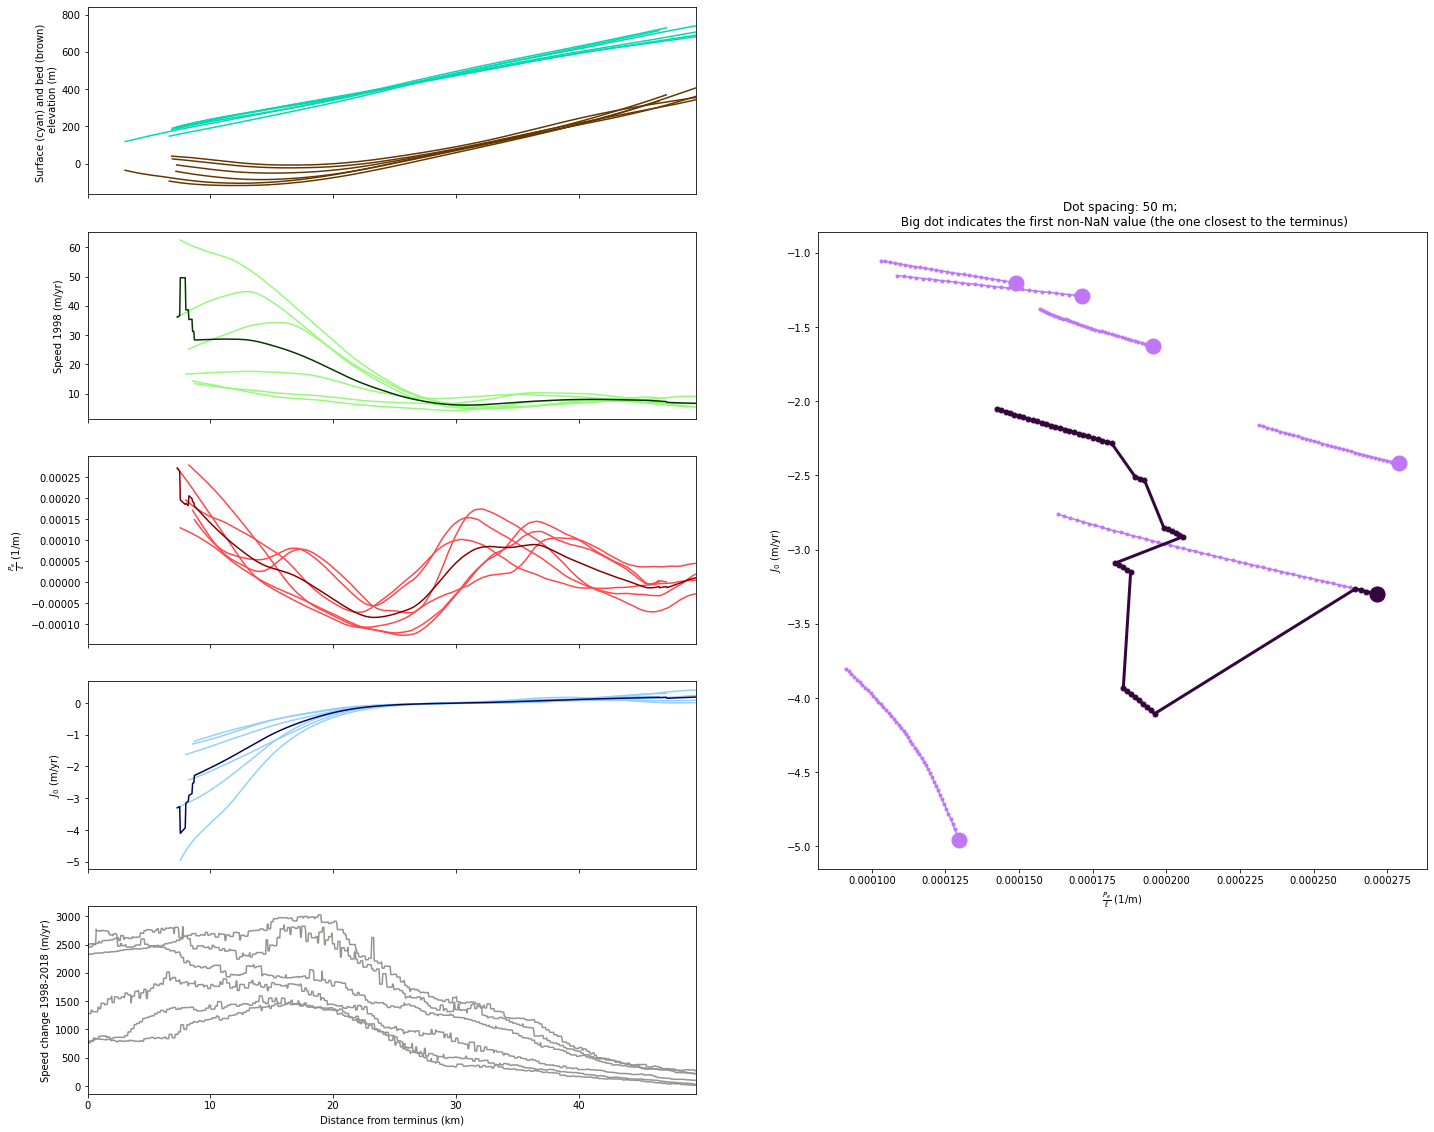

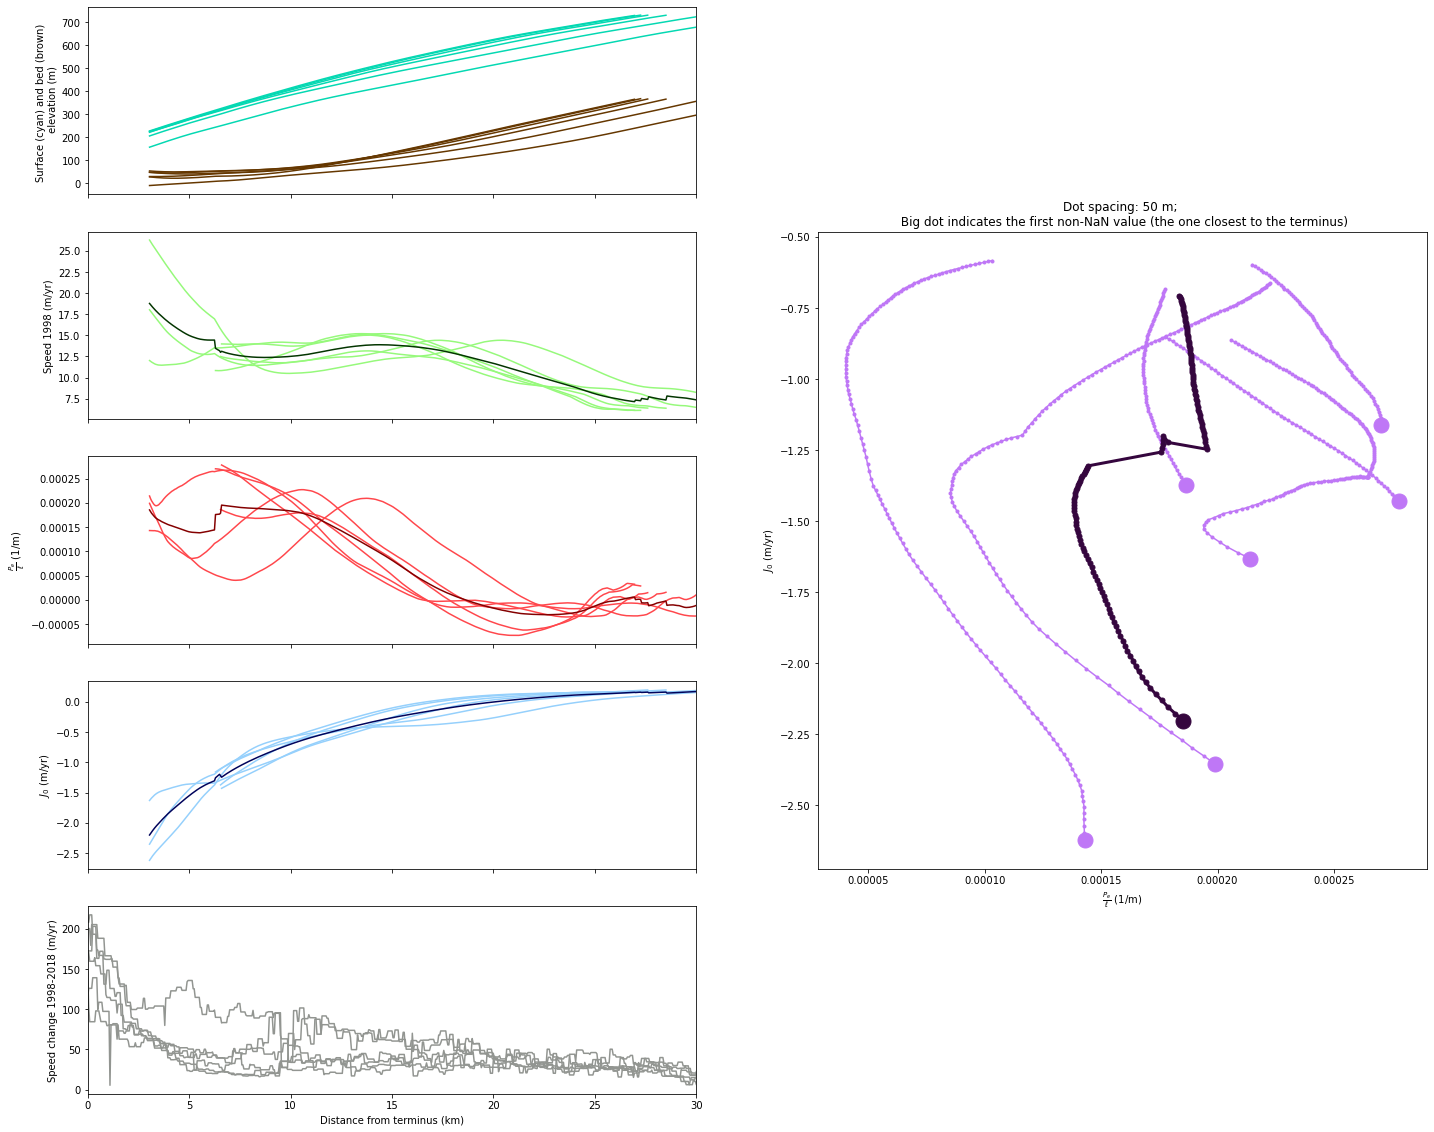

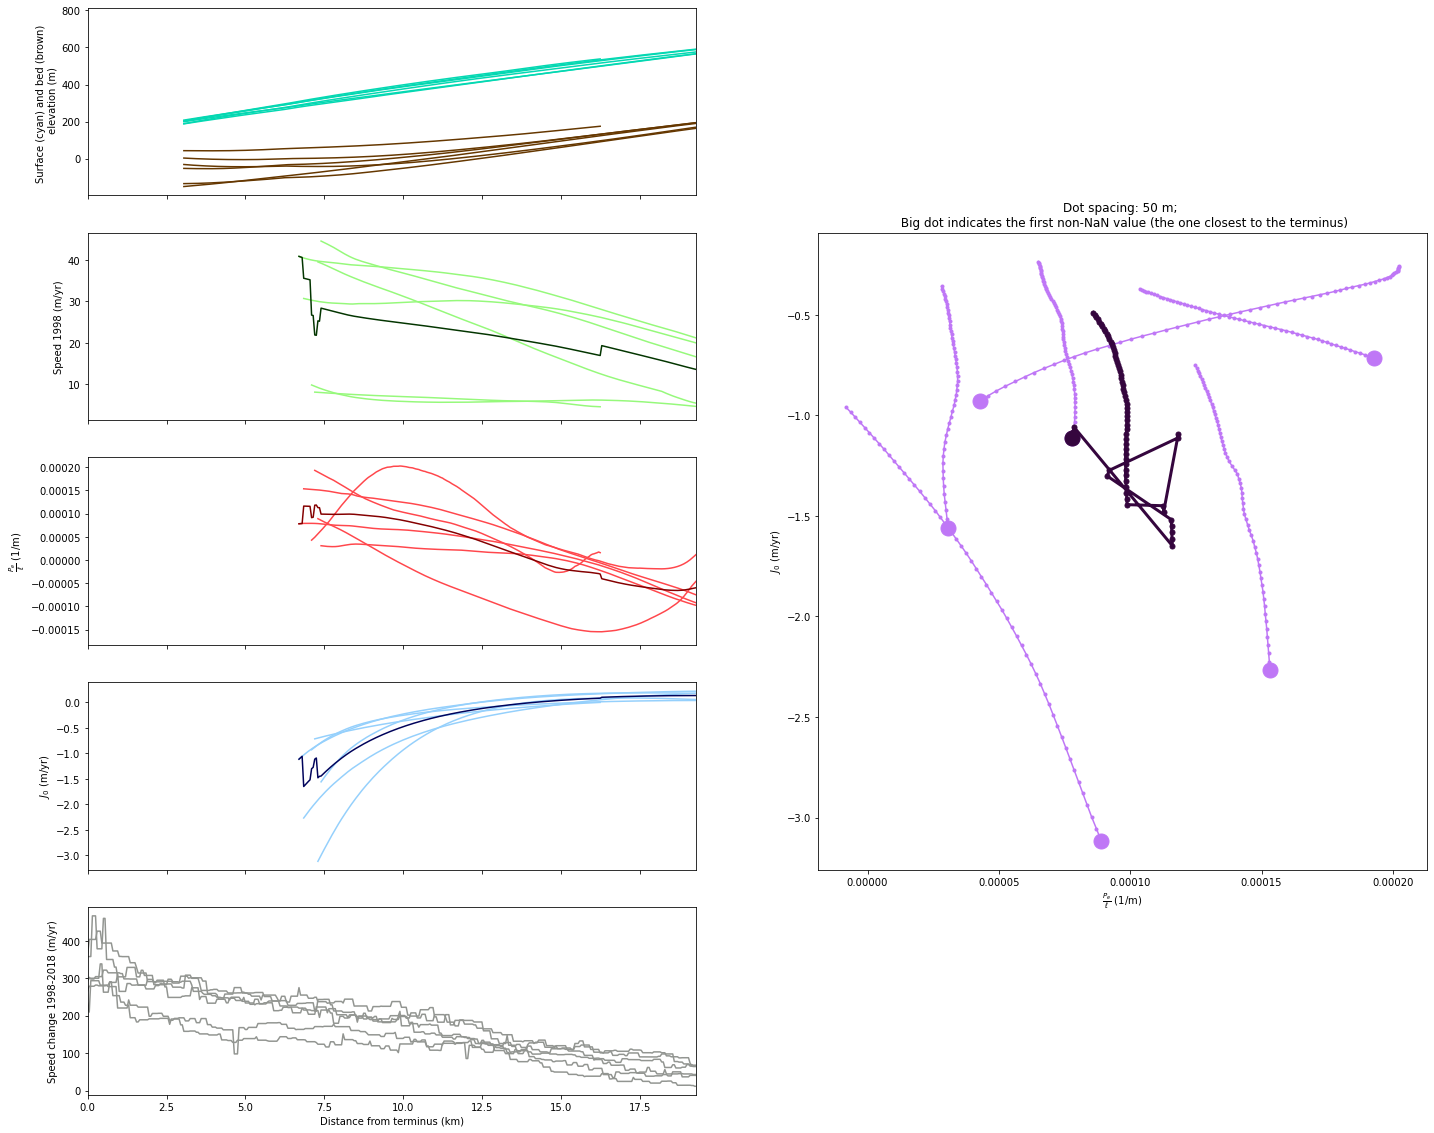

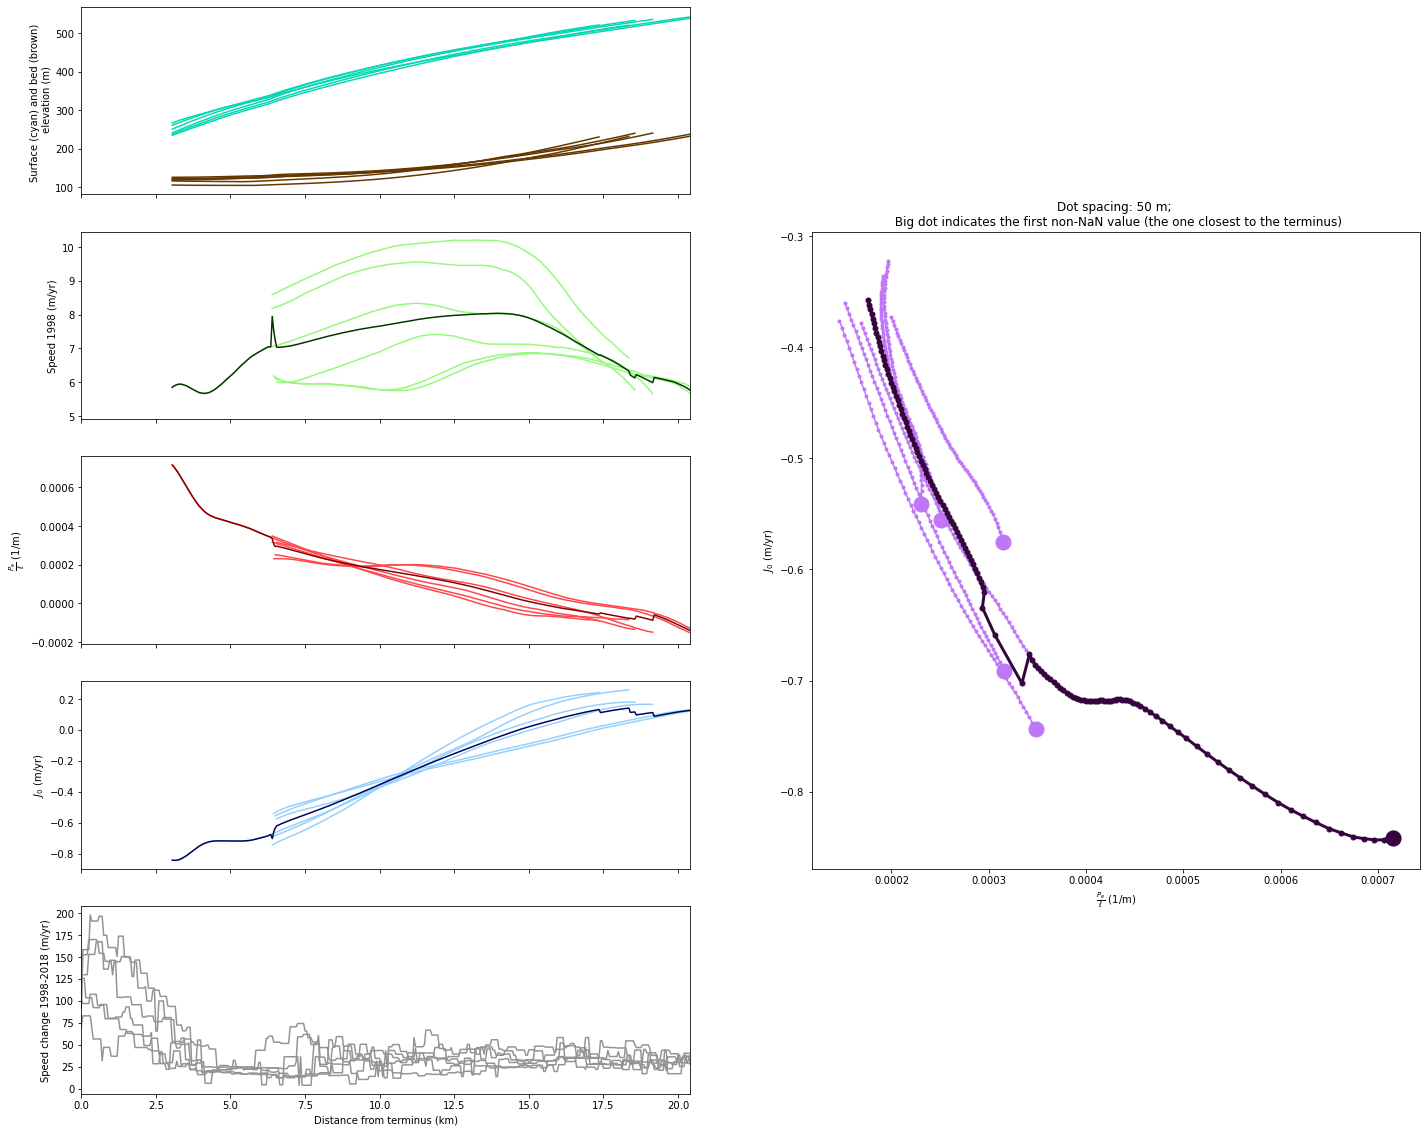

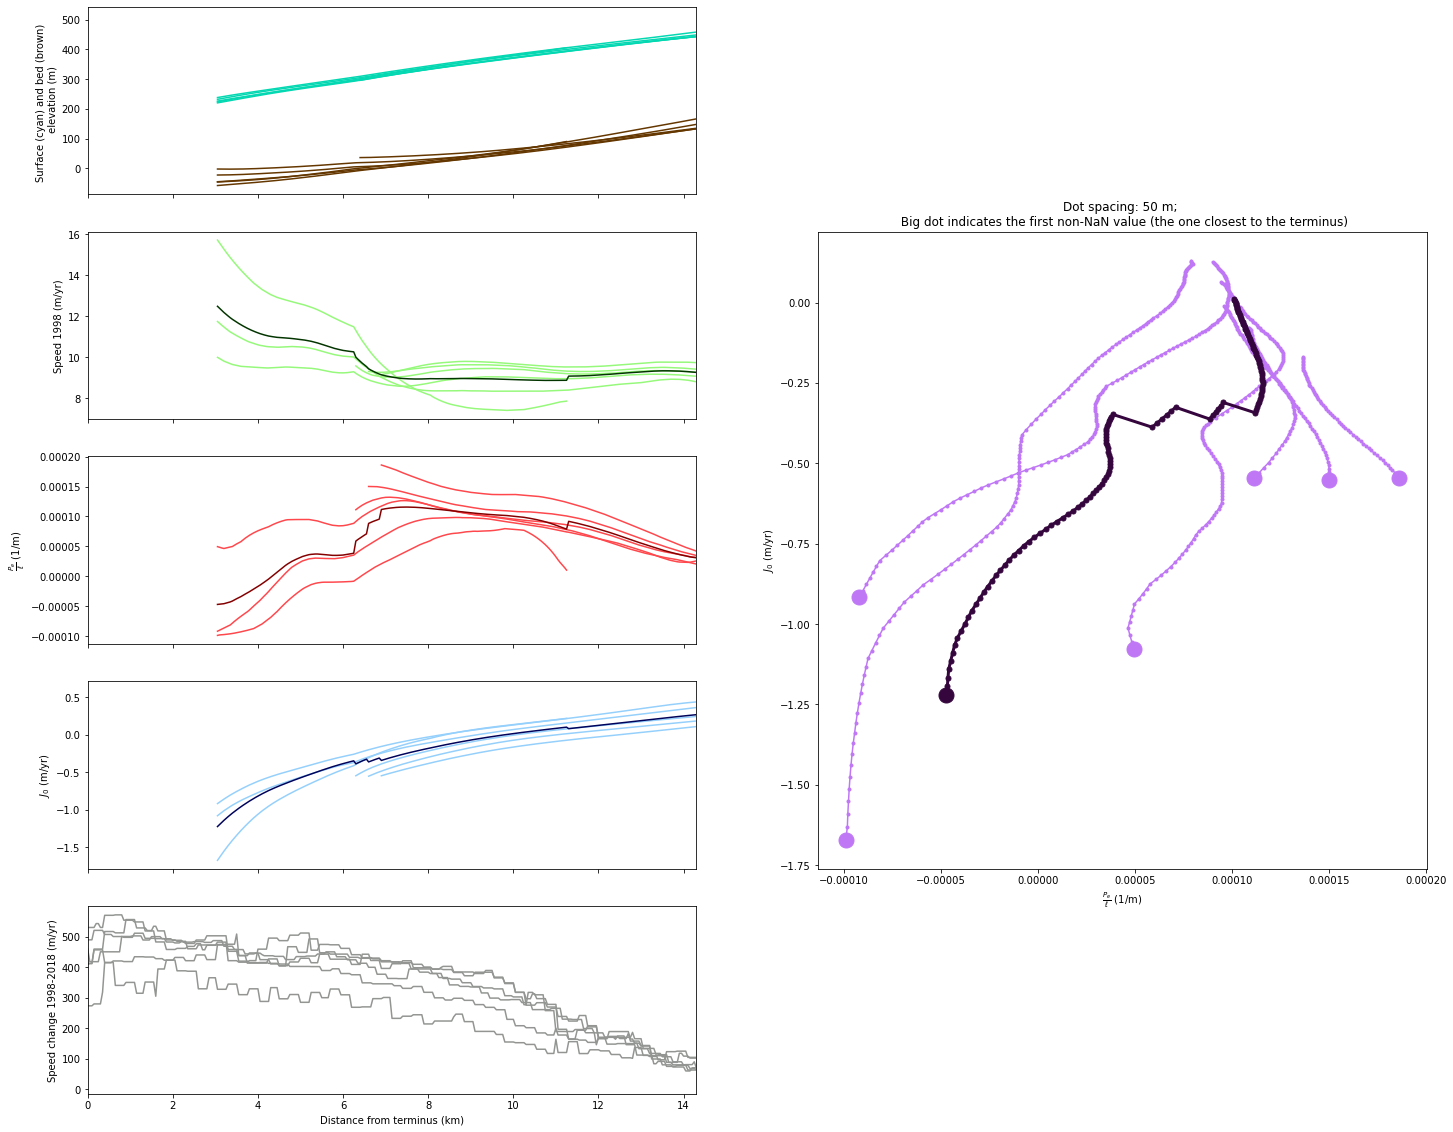

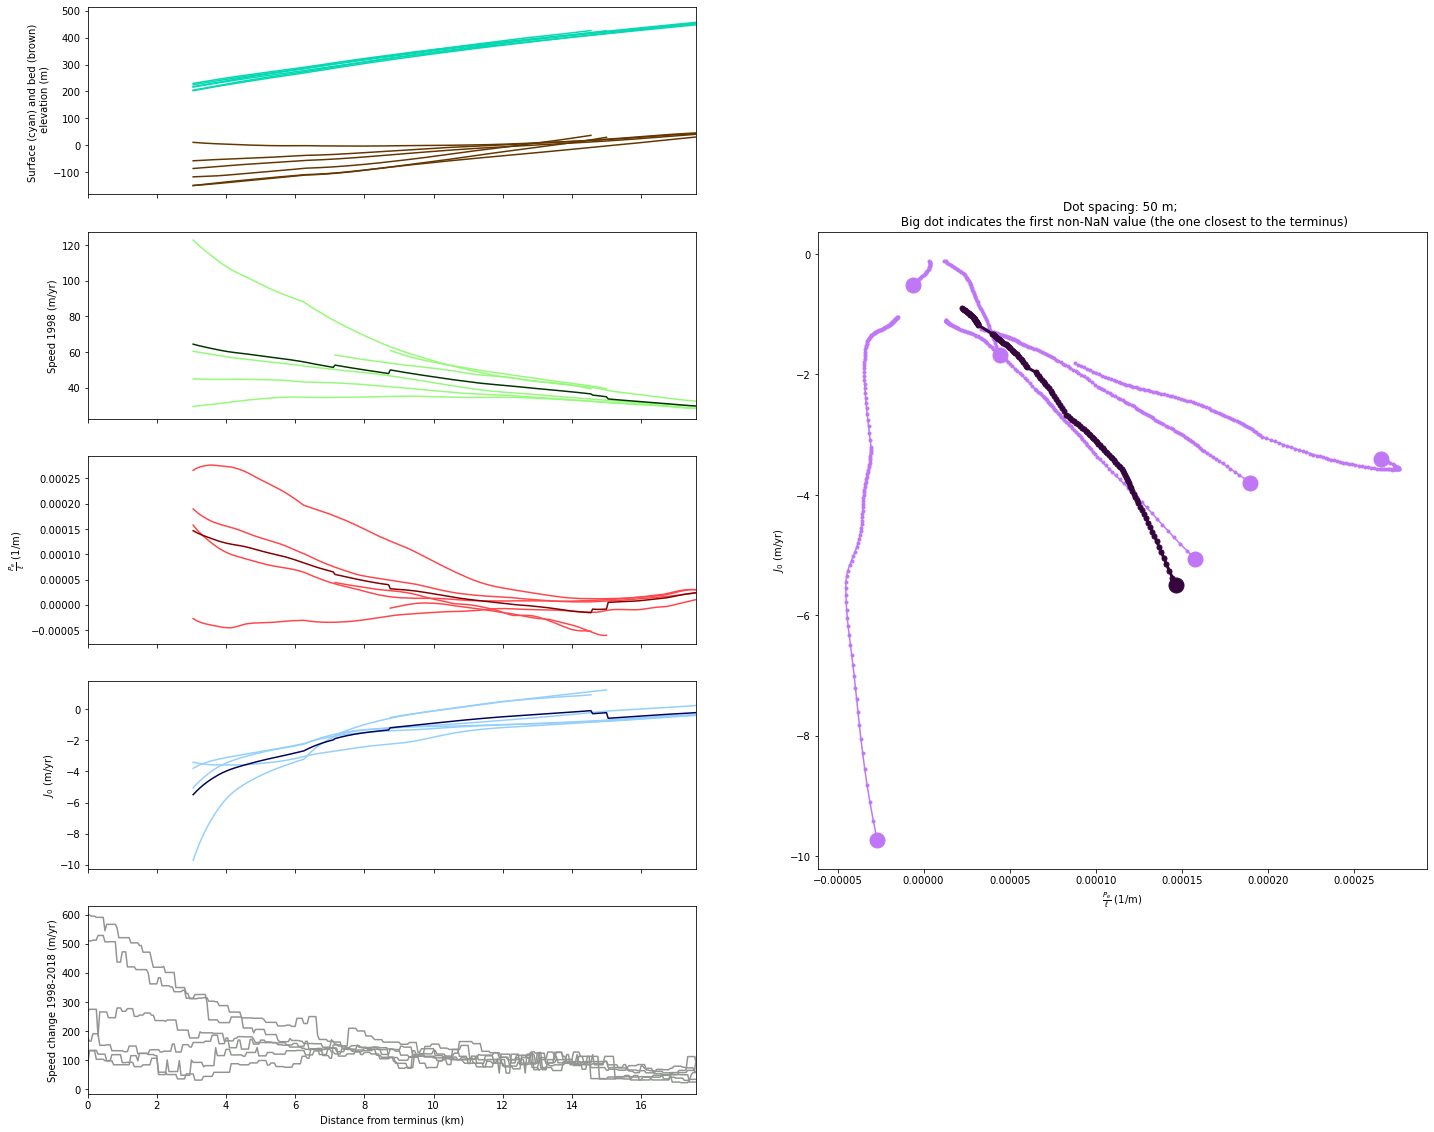

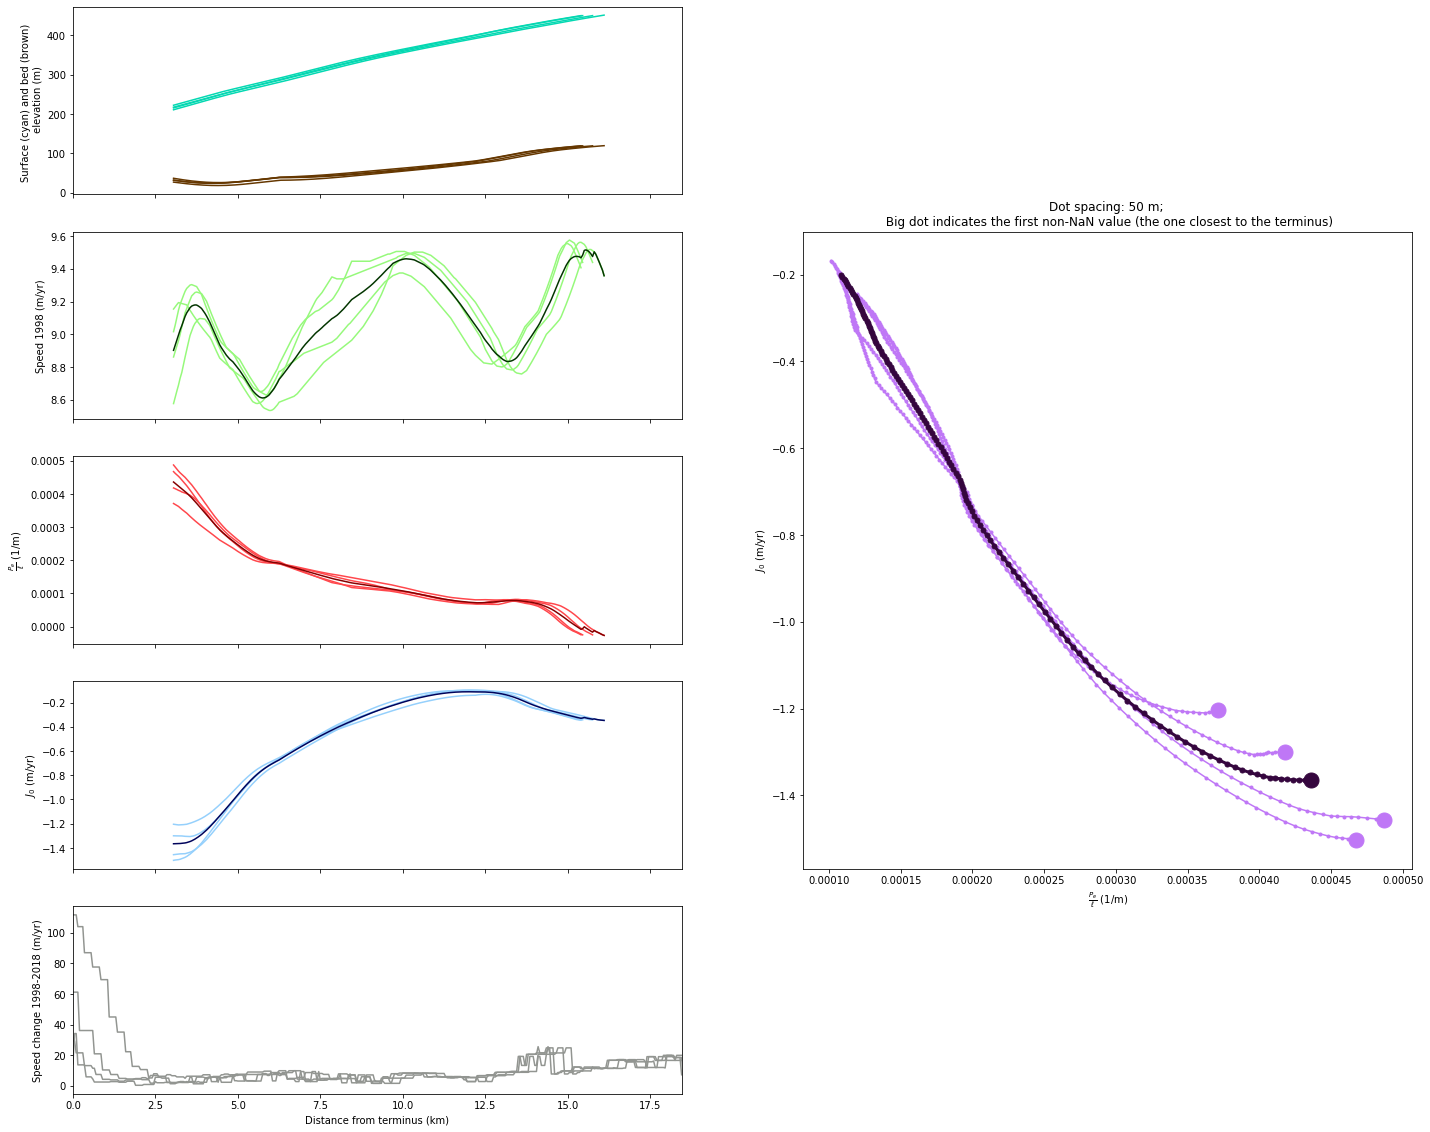

In [11]:
basin_no_list = [1, 3, 4, 5, 6, 7, 10, 17]

for basin_no in basin_no_list:
    fig, ax1 = plt.subplots(5, 2, sharex=True, figsize=(24, 20))
    gs = ax1[1, 1].get_gridspec()
    for ax in ax1[:, 1]:
        ax.remove()
    axbig = fig.add_subplot(gs[1:4, 1])

    pej0_plot_length = 200
    # fig, ax1 = plt.subplots(5, 1, sharex=True, figsize=(10, 15))
    for key in results[basin_no]:
        if key != 'avg':
            ax1[0, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['s'], color='xkcd:aquamarine')
            ax1[0, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['b'], color='xkcd:brown')
            ax1[1, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['u'], color='xkcd:light green')
            ax1[2, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['pe_ignore_dslope'], color='xkcd:light red')
            ax1[3, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['j0_ignore_dslope'], color='xkcd:light blue')
            ax1[4, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['udiff'], color='xkcd:gray')
            axbig.plot(results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length], results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length], '.-', color='xkcd:light purple')
            # plot first non-NaN value (the one closest to the terminus)
            axbig.plot(next(x for x in results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)),
                       next(x for x in results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:light purple', markersize=30)
        else:
            ax1[1, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['u'], color='xkcd:dark green')
            ax1[2, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['pe_ignore_dslope'], color='xkcd:dark red')
            ax1[3, 0].plot(results[basin_no][key]['d'], results[basin_no][key]['j0_ignore_dslope'], color='xkcd:dark blue')
            axbig.plot(results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length], results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length], '.-', color='xkcd:dark purple', linewidth=3, markersize=10)
            # plot first non-NaN value (the one closest to the terminus)
            axbig.plot(next(x for x in results[basin_no][key]['pe_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)),
                       next(x for x in results[basin_no][key]['j0_ignore_dslope'][:pej0_plot_length] if not np.isnan(x)), '.', color='xkcd:dark purple', markersize=30)

    # ax1[0].set_title(Path(glacier_file).stem)
    ax1[0, 0].set_ylabel('Surface (cyan) and bed (brown) \n elevation (m)')
    ax1[1, 0].set_ylabel('Speed 1998 (m/yr)')
    ax1[2, 0].set_ylabel(r'$\frac{P_e}{\ell}$ (1/m)')
    # ax1[2].set_ylim([-0.001, 0.001])
    ax1[3, 0].set_ylabel(r'$J_0$ (m/yr)')
    # ax1[3].set_ylim([-3000, 3000])
    ax1[4, 0].set_xlabel('Distance from terminus (km)')
    ax1[4, 0].set_ylabel('Speed change 1998-2018 (m/yr)')
    ax1[4, 0].set_xlim([0, results[basin_no]['avg']['d'][-1]])
    axbig.set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
    axbig.set_ylabel(r'$J_0$ (m/yr)')
    axbig.set_title('Dot spacing: 50 m; \n Big dot indicates the first non-NaN value (the one closest to the terminus)')
    
    plt.savefig('Austfonna_glacier{}.png'.format(basin_no))

15.001307774876773
1995.3233544221264
83.38103283194671
252.5892255416085
62.77991024200833
440.114008626964
204.9659328615763
14.045791048344565


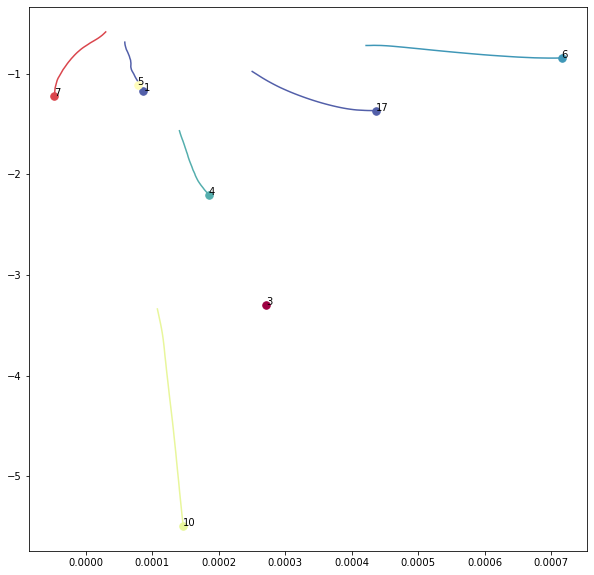

In [14]:
fig, ax2 = plt.subplots(1, 1, sharex=True, figsize=(10, 10))
cmap = cm.get_cmap('Spectral_r')
mega_results = results
for key in mega_results:
    z_max = np.nanmax(mega_results[key]['avg']['udiff_sm'])
    z_min = np.nanmin(mega_results[key]['avg']['udiff_sm'])
    z_value = z_max if abs(z_max) > abs(z_min) else z_min
    print(z_value)
    z_value_scaled = z_value / 500
    rgba = cmap(z_value_scaled)
    # if z_value > 200:
    #     linecolor = 'xkcd:red'
    # elif z_value < -250: 
    #     linecolor = 'xkcd:blue'
    # else:
    #     linecolor = 'xkcd:green'
    # linecolor = (z_value + 500) / 3500
    # linecolor = 1 if linecolor > 1 else linecolor 
    # linecolor = 0 if linecolor < 0 else linecolor 
    # ax2.plot(mega_results[key]['avg']['pe'][:100], mega_results[key]['avg']['j0'][:100], color=linecolor)
    ax2.plot(mega_results[key]['avg']['pe_ignore_dslope'][:100], mega_results[key]['avg']['j0_ignore_dslope'][:100], color=rgba)
    ax2.plot(next(x for x in mega_results[key]['avg']['pe_ignore_dslope'] if not np.isnan(x)),
             next(x for x in mega_results[key]['avg']['j0_ignore_dslope'] if not np.isnan(x)), '.', color=rgba, markersize=15)
    ax2.text(next(x for x in mega_results[key]['avg']['pe_ignore_dslope'] if not np.isnan(x)),
             next(x for x in mega_results[key]['avg']['j0_ignore_dslope'] if not np.isnan(x)), str(key)) # , color=rgba, markersize=15)

In [17]:
colors = np.array([[5,113,176,255],
                   [171,229,255,255],
                   [255,240,189,255],
                   [222,130,38,255],
                   [202,0,32,255],
                   [220,22,177,255],
                   [132,17,177,255]])
colors = colors / 255
nodes = (np.array([-500, -300, 100, 500, 1500, 2500, 3500]) + 500) / 4000
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

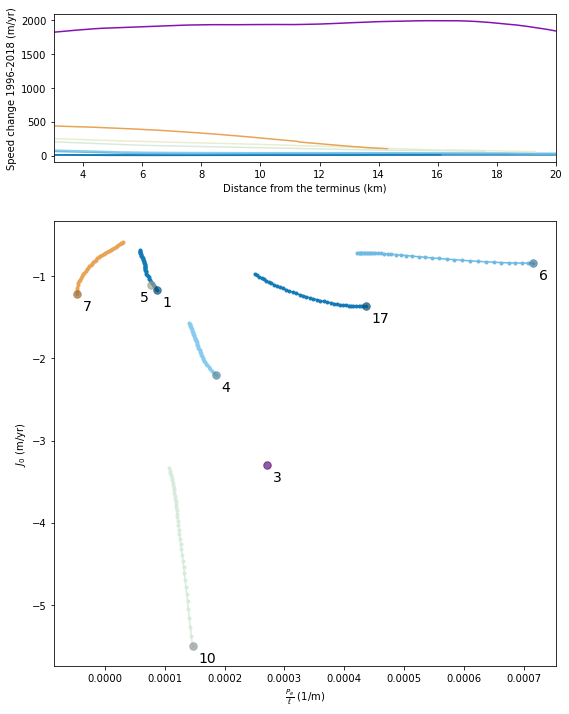

In [29]:
fig, ax4 = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(9, 12))
# fig.tight_layout()
for key in mega_results:
    z_max = np.nanmax(mega_results[key]['avg']['udiff_sm'])
    z_min = np.nanmin(mega_results[key]['avg']['udiff_sm'])
    z_value = z_max if abs(z_max) > abs(z_min) else z_min
    # z_value_scaled = (z_value + 500) / 4000
    z_value_scaled = z_value / 2000
    rgba = mycmap(z_value_scaled)
    rgba2 = np.array(rgba) / 1.5 
    # ax1[0].plot(mega_results[key]['avg']['d'], mega_results[key]['avg']['pe_ignore_dslope'], color=rgba)    # color=burd(linecolor)
    # ax1[0].set_ylim([-0.002, 0.002])
    ax4[0].plot(mega_results[key]['avg']['d'], mega_results[key]['avg']['udiff_sm'], color=rgba)
    ax4[0].set_xlim([3, 20])
    ax4[0].set_xlabel('Distance from the terminus (km)')
    ax4[0].set_ylabel('Speed change 1996-2018 (m/yr)')
    ax4[1].plot(mega_results[key]['avg']['pe_ignore_dslope'][:100], mega_results[key]['avg']['j0_ignore_dslope'][:100], color=rgba)
    ax4[1].plot(mega_results[key]['avg']['pe_ignore_dslope'][:100], mega_results[key]['avg']['j0_ignore_dslope'][:100], '.', color=rgba, markersize=6)
    ax4[1].plot(next(x for x in mega_results[key]['avg']['pe_ignore_dslope'] if not np.isnan(x)),
                next(x for x in mega_results[key]['avg']['j0_ignore_dslope'] if not np.isnan(x)), '.', color=rgba2, markersize=15)
    ax4[1].set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
    ax4[1].set_ylabel(r'$J_0$ (m/yr)')
    if key == 5:
        ax4[1].text(next(x for x in mega_results[key]['avg']['pe_ignore_dslope'] if not np.isnan(x)) - 0.00002,
                    next(x for x in mega_results[key]['avg']['j0_ignore_dslope'] if not np.isnan(x)) - 0.2, str(key), size=14) # , color=rgba, markersize=15)
    else:
        ax4[1].text(next(x for x in mega_results[key]['avg']['pe_ignore_dslope'] if not np.isnan(x)) + 0.00001,
                    next(x for x in mega_results[key]['avg']['j0_ignore_dslope'] if not np.isnan(x)) - 0.2, str(key), size=14) # , color=rgba, markersize=15)
    
fig.savefig('Fig4.png')

In [41]:
print(mega_results[5]['avg']['d'][130:150])

[6.5  6.55 6.6  6.65 6.7  6.75 6.8  6.85 6.9  6.95 7.   7.05 7.1  7.15
 7.2  7.25 7.3  7.35 7.4  7.45]


In [42]:
print(mega_results[5]['avg']['pe_ignore_dslope'][130:150])

[           nan            nan            nan            nan
 7.80116729e-05 7.82979122e-05 7.85389997e-05 1.16066332e-04
 1.15929228e-04 1.15829347e-04 1.15758054e-04 1.15588041e-04
 9.11978719e-05 9.20885457e-05 1.18024571e-04 1.18345858e-04
 1.12756018e-04 1.12635933e-04 9.88154447e-05 9.87094613e-05]
